## 1. Loading Libraries

In [1]:
import pandas as pd
import scipy
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt

## 2. Loading and Understanding the Data

In [68]:
df = pd.read_csv('In-vehicle Coupon Recommendation-cleaned_dataset.csv')

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 98 columns):
 #   Column                                                Non-Null Count  Dtype
---  ------                                                --------------  -----
 0   temperature                                           12684 non-null  int64
 1   has_children                                          12684 non-null  int64
 2   toCoupon_GEQ5min                                      12684 non-null  int64
 3   toCoupon_GEQ15min                                     12684 non-null  int64
 4   toCoupon_GEQ25min                                     12684 non-null  int64
 5   direction_same                                        12684 non-null  int64
 6   direction_opp                                         12684 non-null  int64
 7   Y                                                     12684 non-null  int64
 8   is_alone                                              12684 non-null  int64


In [69]:
df.describe()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,is_alone
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433,0.575922
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314,0.494222
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Exploratory Data Analysis

## 1. Univariate Analysis 

## a) Histogram

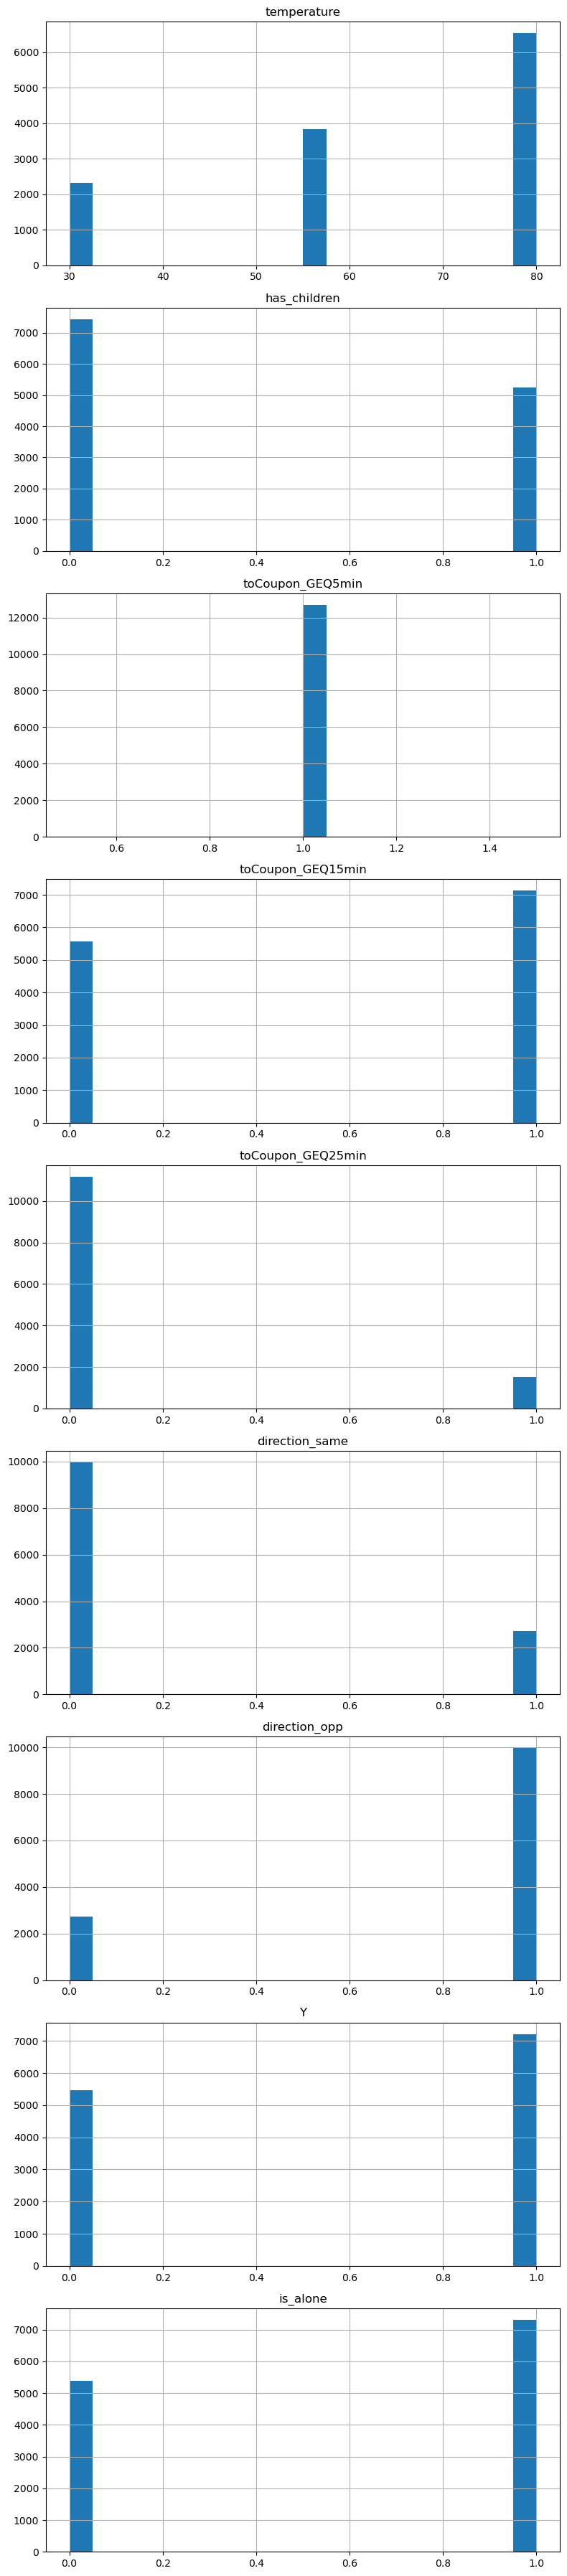

In [15]:
# List all numerical columns in df
numerical_columns = df.select_dtypes(include=['number']).columns

# Create histograms for numerical variables
fig, axes = plt.subplots(len(numerical_columns), 1, figsize=(8, len(numerical_columns) * 4))

# Loop through numerical columns and create histograms
for i, column in enumerate(numerical_columns):
    df[column].hist(ax=axes[i], bins=20)
    axes[i].set_title(column)

plt.tight_layout()
plt.show()

## b) Box Plot

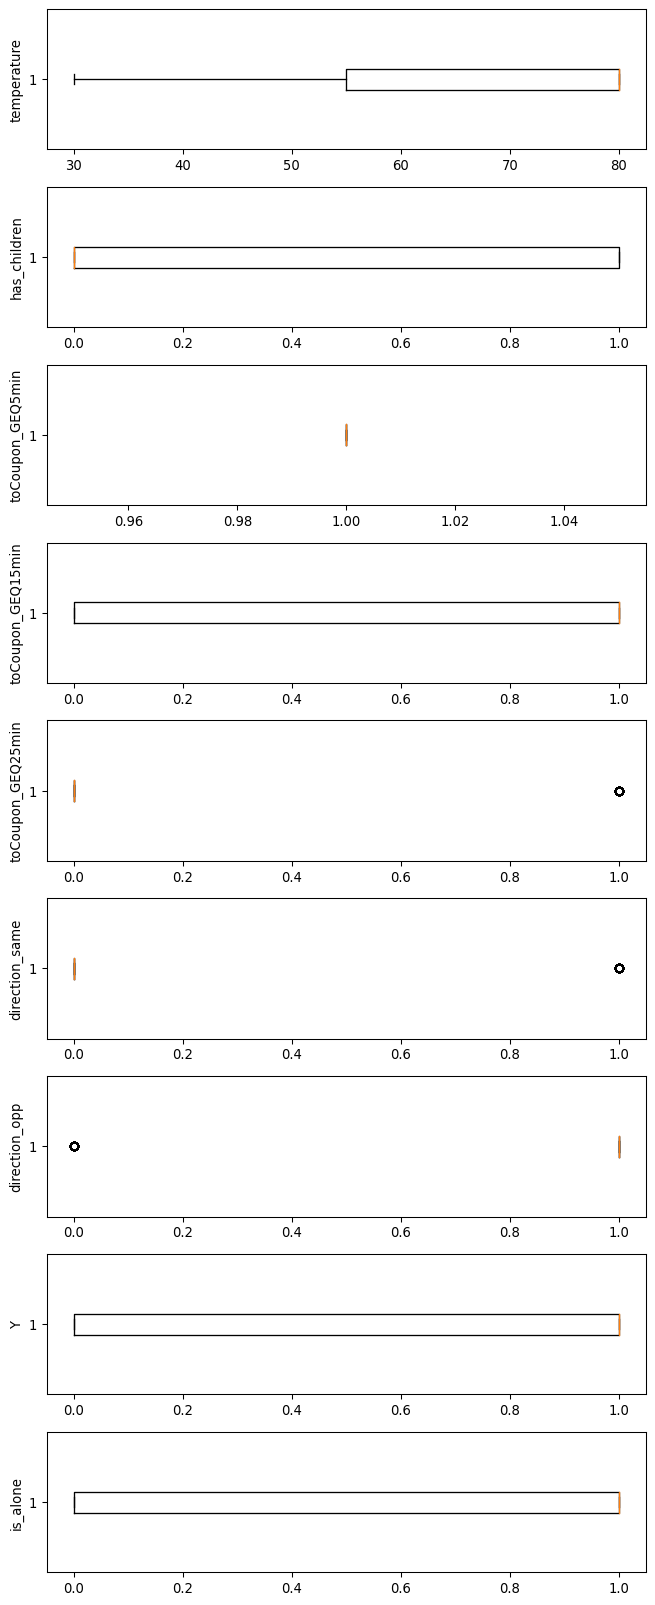

In [16]:
# Filter numerical columns
numerical_columns = df.select_dtypes(include=['number']).columns

# Create subplots based on the number of numerical columns
fig, axs = plt.subplots(len(numerical_columns), 1, dpi=95, figsize=(7, 17))

# Loop through numerical columns and create boxplots
for i, col in enumerate(numerical_columns):
    axs[i].boxplot(df[col], vert=False)
    axs[i].set_ylabel(col)

plt.tight_layout()
plt.show()

## c) Bar Charts

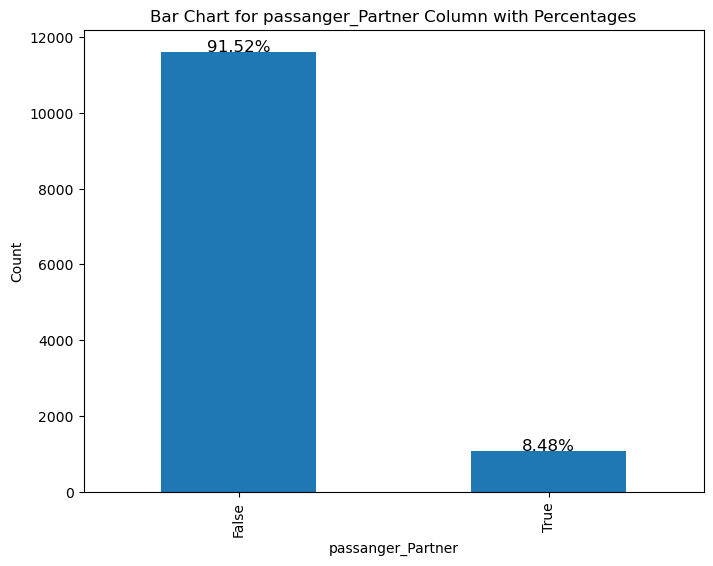

In [13]:
# Calculate the value counts and their percentage
passanger_Partner_counts = df['passanger_Partner'].value_counts()
passanger_Partner_percentage = passanger_Partner_counts/passanger_Partner_counts.sum() * 100

# Create the bar chart
ax = passanger_Partner_counts.plot(kind='bar', figsize=(8, 6))

# Set title and labels
plt.title('Bar Chart for passanger_Partner Column with Percentages')
plt.xlabel('passanger_Partner')
plt.ylabel('Count')

# Add percentages on top of bars
for i, count in enumerate(passanger_Partner_counts):
    ax.text(i, count + 5, f'{passanger_Partner_percentage[i]:.2f}%', ha='center', fontsize=12)

# Show the plot
plt.show()

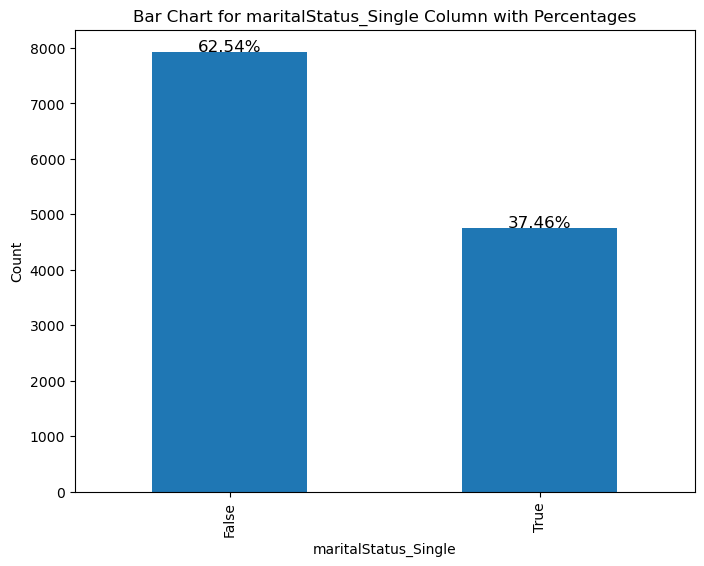

In [14]:
# Calculate the value counts and their percentage
maritalStatus_Single_counts = df['maritalStatus_Single'].value_counts()
maritalStatus_Single_percentage = maritalStatus_Single_counts/passanger_Partner_counts.sum() * 100

# Create the bar chart
ax = maritalStatus_Single_counts.plot(kind='bar', figsize=(8, 6))

# Set title and labels
plt.title('Bar Chart for maritalStatus_Single Column with Percentages')
plt.xlabel('maritalStatus_Single')
plt.ylabel('Count')

# Add percentages on top of bars
for i, count in enumerate(maritalStatus_Single_counts):
    ax.text(i, count + 5, f'{maritalStatus_Single_percentage[i]:.2f}%', ha='center', fontsize=12)

# Show the plot
plt.show()

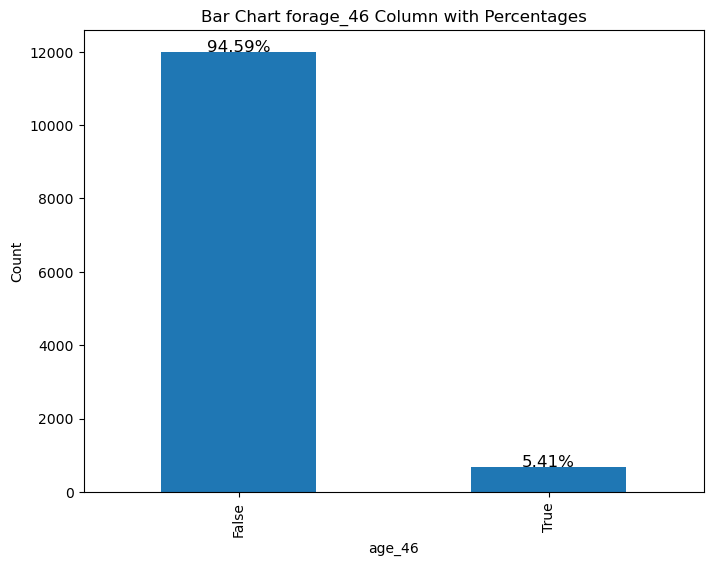

In [17]:
# Calculate the value counts and their percentage
age_46_counts = df['age_46'].value_counts()
age_46_percentage = age_46_counts / age_46_counts.sum() * 100

# Create the bar chart
ax = age_46_counts.plot(kind='bar', figsize=(8, 6))

# Set title and labels
plt.title('Bar Chart forage_46 Column with Percentages')
plt.xlabel('age_46')
plt.ylabel('Count')

# Add percentages on top of bars
for i, count in enumerate(age_46_counts):
    ax.text(i, count + 5, f'{age_46_percentage[i]:.2f}%', ha='center', fontsize=12)

# Show the plot
plt.show()

## d) Frequency Table

In [23]:
categorical_columns = ['weather_Snowy', 'coupon_Restaurant(20-50)', 'education_Bachelors degree', 'occupation_Community & Social Services' , 'occupation_Computer & Mathematical', 'occupation_Construction & Extraction', 'occupation_Education&Training&Library', 'occupation_Student', 'occupation_Unemployed', 'income_group_Low', 'income_group_Medium'] 

for col in categorical_columns:
    print(f"\nFrequency Table for {col}:\n")
    print(df[col].value_counts())


Frequency Table for weather_Snowy:

weather_Snowy
False    11279
True      1405
Name: count, dtype: int64

Frequency Table for coupon_Restaurant(20-50):

coupon_Restaurant(20-50)
False    11192
True      1492
Name: count, dtype: int64

Frequency Table for education_Bachelors degree:

education_Bachelors degree
False    8349
True     4335
Name: count, dtype: int64

Frequency Table for occupation_Community & Social Services:

occupation_Community & Social Services
False    12443
True       241
Name: count, dtype: int64

Frequency Table for occupation_Computer & Mathematical:

occupation_Computer & Mathematical
False    11276
True      1408
Name: count, dtype: int64

Frequency Table for occupation_Construction & Extraction:

occupation_Construction & Extraction
False    12530
True       154
Name: count, dtype: int64

Frequency Table for occupation_Education&Training&Library:

occupation_Education&Training&Library
False    11741
True       943
Name: count, dtype: int64

Frequency Table fo

## 2. Bivariate and Multivariate Analysis

## a) Scatter Plot

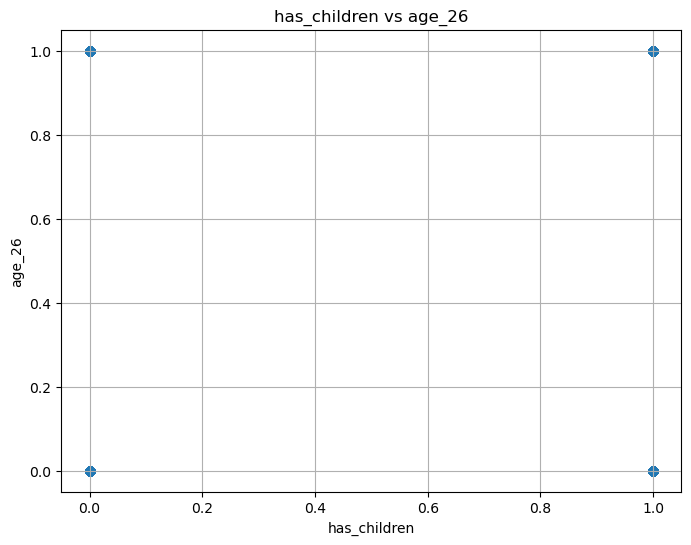

In [27]:
plt.figure(figsize=(8,6))
plt.scatter(df['has_children'], df['age_26'], alpha=0.6)
plt.title('has_children vs age_26')
plt.xlabel('has_children')
plt.ylabel('age_26')
plt.grid(True)
plt.show()

## b. Correlation Heat Map

In [48]:
# Convert all boolean columns to integers so they can be used in correlation
df_corr = df.copy()
bool_cols = df_corr.select_dtypes('bool').columns
df_corr[bool_cols] = df_corr[bool_cols].astype(int)

# Now select all numeric columns
numeric_df = df_corr.select_dtypes(include=['int64', 'float64'])

# Compute the correlation matrix
corr = numeric_df.corr()

# Check for empty correlation matrix
if corr.empty:
    print("Correlation matrix is empty. Nothing to plot.")
else:
    # Plot the heatmap
    plt.figure(figsize=(16, 12))
    sns.heatmap(corr, annot=False, cmap='coolwarm', fmt=".2f", linewidths=0.5)
    plt.title('Correlation Heatmap (Including Binary Variables)')
    plt.tight_layout()
    plt.show()

Correlation matrix is empty. Nothing to plot.


In [29]:
corr['has_children'].sort_values(ascending = False)

has_children                     1.000000
maritalStatus_Married partner    0.471653
passanger_Kid(s)                 0.339019
age_41                           0.242032
age_50plus                       0.221011
                                   ...   
age_below21                     -0.161158
age_26                          -0.192556
occupation_Student              -0.222232
maritalStatus_Single            -0.455010
toCoupon_GEQ5min                      NaN
Name: has_children, Length: 98, dtype: float64

In [31]:
corr['occupation_Student'].sort_values(ascending = False)

occupation_Student                    1.000000
age_below21                           0.458669
maritalStatus_Single                  0.182085
education_Some college - no degree    0.180671
income_Less than $12500               0.177064
                                        ...   
age_50plus                           -0.153026
occupation_Unemployed                -0.157088
has_children                         -0.222232
maritalStatus_Married partner        -0.239739
toCoupon_GEQ5min                           NaN
Name: occupation_Student, Length: 98, dtype: float64

## c. Stacked bar plots

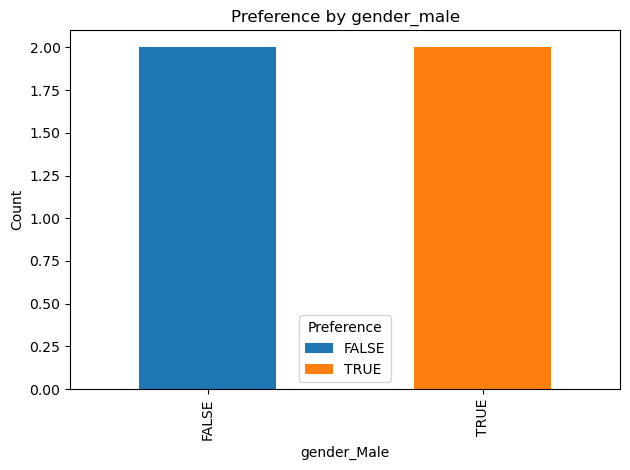

In [34]:
data = {'gender_Male': ['FALSE', 'TRUE', 'FALSE', 'TRUE'],
    'maritalStatus_Married partner': ['FALSE', 'TRUE', 'FALSE', 'TRUE']}

df = pd.DataFrame(data)

# Create a contingency table
ct = pd.crosstab(df['gender_Male'], df['maritalStatus_Married partner'])

# Plot as stacked bar
ct.plot(kind='bar', stacked=True)

# Add labels and title
plt.xlabel('gender_Male')
plt.ylabel('Count')
plt.title('Preference by gender_male')
plt.legend(title='Preference')
plt.tight_layout()

plt.show()

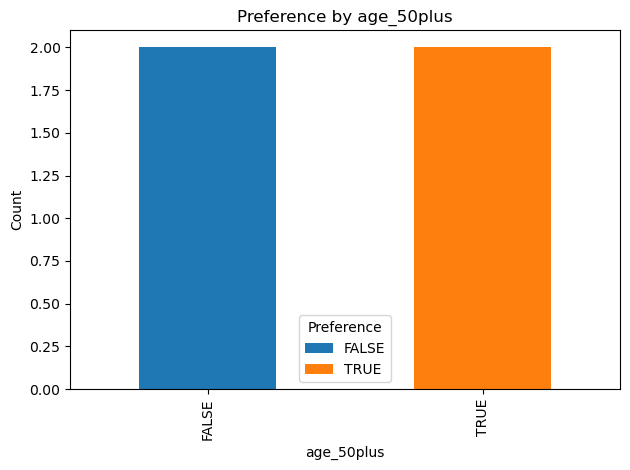

In [50]:
data = {'age_50plus': ['FALSE', 'TRUE', 'FALSE', 'TRUE'],
    'maritalStatus_Widowed': ['FALSE', 'TRUE', 'FALSE', 'TRUE']}

df = pd.DataFrame(data)

# Create a contingency table
ct = pd.crosstab(df['age_50plus'], df['maritalStatus_Widowed'])

# Plot as stacked bar
ct.plot(kind='bar', stacked=True)

# Add labels and title
plt.xlabel('age_50plus')
plt.ylabel('Count')
plt.title('Preference by age_50plus')
plt.legend(title='Preference')
plt.tight_layout()

plt.show()

### Based on the figure and bars,  the data is not able to plot correlations between these values.

## 3. Correlation Analysis

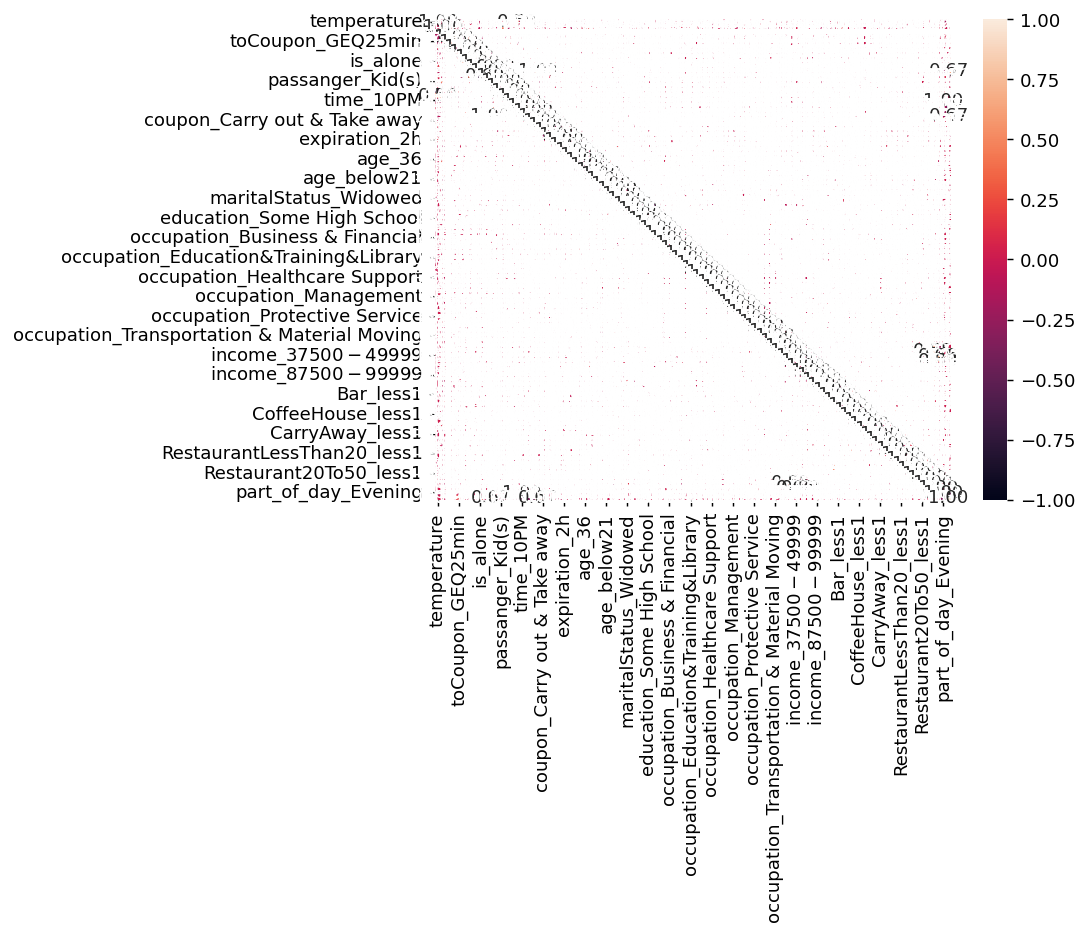

In [73]:
corr = df.corr()

plt.figure(dpi=130)
sns.heatmap(df.corr(), annot=True, fmt= '.2f')
plt.show()